# Exploratory Data Analysis on the Fuel Imports of South Africa Data Set

## Introduction
The data set that I have chosen to analyze, consists of all the fuel imports to South Africa between the period 2010 to 2011.
The data consists of The Imports by country as well as region. We have access to the Customs Value of the imports as well as the quantity purchased.

The objective of this task is to analyze which countries supply South Africa with what kind of fuel and in what quantities. To find out the cost to South Africa for importation per country. The type of fuel South Africa imports. Who does South Africa import the most from.

## Data Cleaning
Before we can analyze the data set; we must first establish all descriptive values within the set. We must also determine if there are any values that need to be formatted to easily work with Python. We need to ensure the data does not conatian any missing values. We need to determine the volume of unique values in case we have multiple descriptive variables contributing to the same value. We also need to determine if there are any columns within the set that do not contribute in a meaningful way to our analysis. 

I will be using Pandas commands and operations to do the initial analysis of the raw data. I will also be using missingno library to visualliy represent any missing data values or values that have NAN inputs.

In [153]:
# Import all required libraries for the task
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [154]:
# Read the dataset as a dataframe with pandas
df = pd.read_csv('fuel.csv')
df

,tradetype,districtofficecode,districtofficename,countryoforigin,countryoforiginname,countryofdestination,countryofdestinationname,tariff,statisticalunit,transportcode,...,yearmonth,calendaryear,section,sectionanddescription,chapter,chapteranddescription,tariffanddescription,statisticalquantity,customsvalue,worldregion
0,Imports,CTN,Cape Town,NG,Nigeria,ZA,South Africa,27090000,KG,0,...,201003,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27090000 - Petroleum Oils And Oils Obtained Fr...,1.203726e+08,546876249,AFRICA
1,Imports,CTN,Cape Town,US,United States,ZA,South Africa,27121020,KG,0,...,201003,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27121020 - In immediate packings of a content...,1.300000e+01,3469,AMERICA
2,Imports,CTN,Cape Town,US,United States,ZA,South Africa,27030000,KG,0,...,201003,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity","27030000 - Peat (Including Peat Litter), Wheth...",2.031200e+04,69173,AMERICA
3,Imports,CTN,Cape Town,US,United States,ZA,South Africa,27101147,KG,0,...,201003,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27101147 - Lubricating grease,2.800000e+02,39823,AMERICA
4,Imports,CTN,Cape Town,PT,Portugal,ZA,South Africa,27121020,KG,0,...,201003,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27121020 - In immediate packings of a content...,3.000000e+01,703,EUROPE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Imports,CTN,Cape Town,CA,Canada,ZA,South Africa,27101900,KG,0,...,201004,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27101900 - Other,3.447620e+04,811292,AMERICA
996,Imports,DBN,Durban,CA,Canada,ZA,South Africa,27030000,KG,0,...,201004,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity","27030000 - Peat (Including Peat Litter), Wheth...",5.173100e+04,192365,AMERICA
997,Imports,CTN,Cape Town,IT,Italy,ZA,South Africa,27111310,KG,0,...,201004,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27111310 - In immediate packings of a content ...,1.740400e+02,15289,EUROPE
998,Imports,CTN,Cape Town,NL,Netherlands,ZA,South Africa,27101900,KG,0,...,201004,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27101900 - Other,2.722000e+03,84750,EUROPE


In [155]:
# Determine all column names
df.columns

Index(['tradetype', 'districtofficecode', 'districtofficename',
       'countryoforigin', 'countryoforiginname', 'countryofdestination',
       'countryofdestinationname', 'tariff', 'statisticalunit',
       'transportcode', 'transportcodedescription', 'yearmonth',
       'calendaryear', 'section', 'sectionanddescription', 'chapter',
       'chapteranddescription', 'tariffanddescription', 'statisticalquantity',
       'customsvalue', 'worldregion'],
      dtype='object')

In [156]:
# Determine the type of values stored in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tradetype                 1000 non-null   object 
 1   districtofficecode        1000 non-null   object 
 2   districtofficename        1000 non-null   object 
 3   countryoforigin           960 non-null    object 
 4   countryoforiginname       1000 non-null   object 
 5   countryofdestination      1000 non-null   object 
 6   countryofdestinationname  1000 non-null   object 
 7   tariff                    1000 non-null   int64  
 8   statisticalunit           1000 non-null   object 
 9   transportcode             1000 non-null   int64  
 10  transportcodedescription  1000 non-null   object 
 11  yearmonth                 1000 non-null   int64  
 12  calendaryear              1000 non-null   int64  
 13  section                   1000 non-null   int64  
 14  sectionan

In [157]:
df.shape

(1000, 21)

Upon first glance, we can see that we have 21 columns and the range of rows amounts to 1000 entries. It is immediately noticable that 'countryoforigin' stands out as having less entries than the rest. This is an indication of missing data. To ensure accuracy, I will be determining the validity of my assumption with Pandas .isnull() command as well as visully representing any missing values.

In [158]:
# Determine if the data set includes any missing values
missing_values_count = df.isnull().sum()
missing_values_count

tradetype                    0
districtofficecode           0
districtofficename           0
countryoforigin             40
countryoforiginname          0
countryofdestination         0
countryofdestinationname     0
tariff                       0
statisticalunit              0
transportcode                0
transportcodedescription     0
yearmonth                    0
calendaryear                 0
section                      0
sectionanddescription        0
chapter                      0
chapteranddescription        0
tariffanddescription         0
statisticalquantity          0
customsvalue                 0
worldregion                  0
dtype: int64

In [159]:
# Determine the Percentage of missing values in the data set
missing_values_count / len(df) * 100

tradetype                   0.0
districtofficecode          0.0
districtofficename          0.0
countryoforigin             4.0
countryoforiginname         0.0
countryofdestination        0.0
countryofdestinationname    0.0
tariff                      0.0
statisticalunit             0.0
transportcode               0.0
transportcodedescription    0.0
yearmonth                   0.0
calendaryear                0.0
section                     0.0
sectionanddescription       0.0
chapter                     0.0
chapteranddescription       0.0
tariffanddescription        0.0
statisticalquantity         0.0
customsvalue                0.0
worldregion                 0.0
dtype: float64

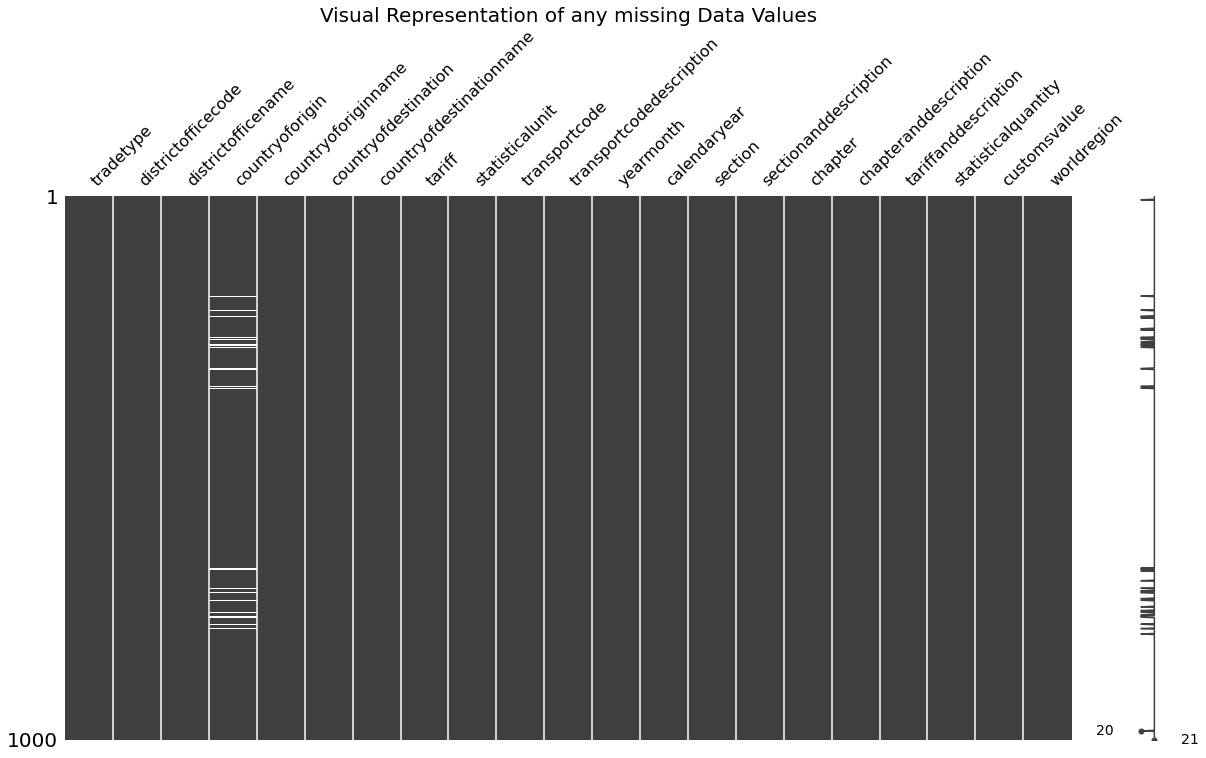

In [160]:
# Visually representing missing data
missingno.matrix(df, figsize = (20,10))
plt.title('Visual Representation of any missing Data Values', fontsize=20)
plt.show()

#### Column Descriptions
Based on the initial reading of the data set, we can immediately see there are columns that are either redundant, or that add no meaningful value to our analysis.

We know that we are analyzing Imports of Fuel; therefore, the columns 'TradeType', 'Country_of_Destination', 'Country_of_Destination_Name' are meaningless to us. We can however, use the 'District_Office_Name' column to show where in South Africa the imports are being delivered to.

We have also been provided with dates for each import. There are 2 columns; One to give us a value on the year and month; the other gives us a value on only the year. This will be useful to us as we can analyze how imports fluctuate on a monthly basis as well as how our total imports compare for the 2 years.

#### Redundant Columns
'districtofficecode' and 'districtofficename' provide the same descriptive data. We know CTN represent the city Cape Town and DBN represents the city Durban. To make it easier for users of our analysis, I will be dropping the 'districtofficecode' column.

'Country_Of_Origin' and 'Country_Of_Origin_Name' provide the same details as above. From an ease of access perspective, we are not interested in the code of the country, but more so the country's full name. I will be dropping the 'Country_Of_Origin' column

We have multiple columns that give us an ID number (transportcode, chapter), followed by the description of that ID (transportcodedescription, chapterdescription). When we look at our data set we find that the ID description contains the ID as well. This allows us to to drop any columns containing only an ID number, as we can use the Pandas .unique() command to extract the ID from its description.

In [161]:
# Checking unique values in select columns
df['chapteranddescription'].unique()

array(['27 - Crude, Coal, Petroleum and Electricity'], dtype=object)

In [162]:
df['sectionanddescription'].unique()

array(['5 - Mineral Products'], dtype=object)

We can remove the 'chapteranddescription' and 'sectionanddescription' column as they contain only 1 variable that will provide no useful information.

In [163]:
# Dropping Redundant columns and columns that provide no meanningful data
df.drop(['tradetype', 'districtofficecode', 'countryoforigin', 'districtofficecode', 'countryofdestination',
       'countryofdestinationname', 'tariff', 'section', 'chapter', 'chapteranddescription', 'sectionanddescription'], axis=1, inplace=True)
df

,districtofficename,countryoforiginname,statisticalunit,transportcode,transportcodedescription,yearmonth,calendaryear,tariffanddescription,statisticalquantity,customsvalue,worldregion
0,Cape Town,Nigeria,KG,0,Transport mode not specified (Unknown - Other),201003,2010,27090000 - Petroleum Oils And Oils Obtained Fr...,1.203726e+08,546876249,AFRICA
1,Cape Town,United States,KG,0,Transport mode not specified (Unknown - Other),201003,2010,27121020 - In immediate packings of a content...,1.300000e+01,3469,AMERICA
2,Cape Town,United States,KG,0,Transport mode not specified (Unknown - Other),201003,2010,"27030000 - Peat (Including Peat Litter), Wheth...",2.031200e+04,69173,AMERICA
3,Cape Town,United States,KG,0,Transport mode not specified (Unknown - Other),201003,2010,27101147 - Lubricating grease,2.800000e+02,39823,AMERICA
4,Cape Town,Portugal,KG,0,Transport mode not specified (Unknown - Other),201003,2010,27121020 - In immediate packings of a content...,3.000000e+01,703,EUROPE
...,...,...,...,...,...,...,...,...,...,...,...
995,Cape Town,Canada,KG,0,Transport mode not specified (Unknown - Other),201004,2010,27101900 - Other,3.447620e+04,811292,AMERICA
996,Durban,Canada,KG,0,Transport mode not specified (Unknown - Other),201004,2010,"27030000 - Peat (Including Peat Litter), Wheth...",5.173100e+04,192365,AMERICA
997,Cape Town,Italy,KG,0,Transport mode not specified (Unknown - Other),201004,2010,27111310 - In immediate packings of a content ...,1.740400e+02,15289,EUROPE
998,Cape Town,Netherlands,KG,0,Transport mode not specified (Unknown - Other),201004,2010,27101900 - Other,2.722000e+03,84750,EUROPE


## Missing or Irregular Data
After removing any unneccessary columns; I now analyse the data again to determine if there is any missing data or any data that seems to be irregular.

Transportcode is linked to transportcodedescription. On first glance, it seems as though there is only 1 value in the transportcode column. I will use the .unique() function to ascertain if my assumption is correct.

In [164]:
# Determining the unique values in the transportcode column
df_trans = df['transportcode'].unique()
df_trans

array([0, 3, 2], dtype=int64)

In [165]:
# Determine the unique values in the transportcodedescription column
df_transdes = df['transportcodedescription'].unique()
df_transdes

array(['Transport mode not specified (Unknown - Other)', 'Road', 'Rail'],
      dtype=object)

My assumption was incorrect. It is clear that in the data, we have 3 distinct modes of transport.

Next I will re-examine the dataset for any missing values.

In [166]:
# Determine if the new data set includes any missing values
missing_values_count = df.isnull().sum()
missing_values_count / len(df) * 100

districtofficename          0.0
countryoforiginname         0.0
statisticalunit             0.0
transportcode               0.0
transportcodedescription    0.0
yearmonth                   0.0
calendaryear                0.0
tariffanddescription        0.0
statisticalquantity         0.0
customsvalue                0.0
worldregion                 0.0
dtype: float64

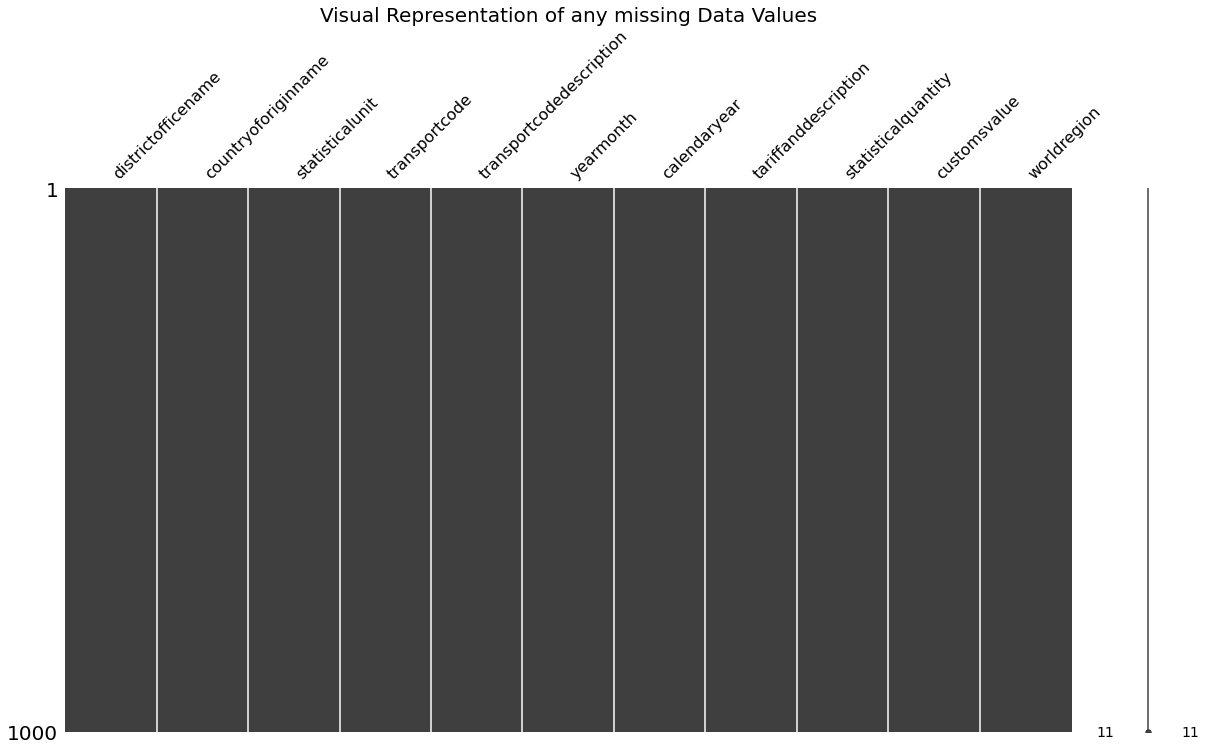

In [167]:
# Visually representing missing data
missingno.matrix(df, figsize = (20,10))
plt.title('Visual Representation of any missing Data Values', fontsize=20)
plt.show()

### Formatting Data
We have 3 columns of interest:
    
    'yearmonth'
    'calendaryear'
    'statisticalquantity'

Currently, the date format is recognised as a int64 dtype. In order for us to work with the date in python, wee need to convert it to an Object dtype.

We have also been given the quantity of fuel imports. It is currently measured in KG; however, due to the large volume recorded, I believe that it would be better to convert this value into Tonnes.

In [168]:
# Checking and Converting Date to Object
#print(df['yearmonth'].dtype)
#print(df['calendaryear'].dtype)

# Convert Date to Object
df['yearmonth'] = df['yearmonth'].apply(lambda x: str(x))
df['calendaryear'] = df['calendaryear'].apply(lambda x: str(x))

# Checking the entire set
df.info()

# Successfully converted int to Object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   districtofficename        1000 non-null   object 
 1   countryoforiginname       1000 non-null   object 
 2   statisticalunit           1000 non-null   object 
 3   transportcode             1000 non-null   int64  
 4   transportcodedescription  1000 non-null   object 
 5   yearmonth                 1000 non-null   object 
 6   calendaryear              1000 non-null   object 
 7   tariffanddescription      1000 non-null   object 
 8   statisticalquantity       1000 non-null   float64
 9   customsvalue              1000 non-null   int64  
 10  worldregion               1000 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 86.1+ KB


In [169]:
# Converting Date objects to type Datetime
# Create a new column to store the new format
df['Year/Month'] = pd.to_datetime(df['yearmonth'], format='%Y%m')
df['Year/Month']

0     2010-03-01
1     2010-03-01
2     2010-03-01
3     2010-03-01
4     2010-03-01
         ...    
995   2010-04-01
996   2010-04-01
997   2010-04-01
998   2010-04-01
999   2011-01-01
Name: Year/Month, Length: 1000, dtype: datetime64[ns]

In [170]:
# Converting year from int to Object
# Only displaying the Year value
df['Year_parse'] = pd.to_datetime(df['calendaryear'], format='%Y')
df['Year'] = pd.DatetimeIndex(df['Year_parse']).year
df['Year']

0      2010
1      2010
2      2010
3      2010
4      2010
       ... 
995    2010
996    2010
997    2010
998    2010
999    2011
Name: Year, Length: 1000, dtype: int64

The year values have been successfully converted to Objects. I can now drop the 'yearmonth' and 'calendaryear' columns

In [171]:
# Dropping redundant columns
df.drop(['yearmonth', 'calendaryear', 'Year_parse'], axis=1, inplace=True)
df

,districtofficename,countryoforiginname,statisticalunit,transportcode,transportcodedescription,tariffanddescription,statisticalquantity,customsvalue,worldregion,Year/Month,Year
0,Cape Town,Nigeria,KG,0,Transport mode not specified (Unknown - Other),27090000 - Petroleum Oils And Oils Obtained Fr...,1.203726e+08,546876249,AFRICA,2010-03-01,2010
1,Cape Town,United States,KG,0,Transport mode not specified (Unknown - Other),27121020 - In immediate packings of a content...,1.300000e+01,3469,AMERICA,2010-03-01,2010
2,Cape Town,United States,KG,0,Transport mode not specified (Unknown - Other),"27030000 - Peat (Including Peat Litter), Wheth...",2.031200e+04,69173,AMERICA,2010-03-01,2010
3,Cape Town,United States,KG,0,Transport mode not specified (Unknown - Other),27101147 - Lubricating grease,2.800000e+02,39823,AMERICA,2010-03-01,2010
4,Cape Town,Portugal,KG,0,Transport mode not specified (Unknown - Other),27121020 - In immediate packings of a content...,3.000000e+01,703,EUROPE,2010-03-01,2010
...,...,...,...,...,...,...,...,...,...,...,...
995,Cape Town,Canada,KG,0,Transport mode not specified (Unknown - Other),27101900 - Other,3.447620e+04,811292,AMERICA,2010-04-01,2010
996,Durban,Canada,KG,0,Transport mode not specified (Unknown - Other),"27030000 - Peat (Including Peat Litter), Wheth...",5.173100e+04,192365,AMERICA,2010-04-01,2010
997,Cape Town,Italy,KG,0,Transport mode not specified (Unknown - Other),27111310 - In immediate packings of a content ...,1.740400e+02,15289,EUROPE,2010-04-01,2010
998,Cape Town,Netherlands,KG,0,Transport mode not specified (Unknown - Other),27101900 - Other,2.722000e+03,84750,EUROPE,2010-04-01,2010


In [172]:
# Converting Kg values to Tonnes
df['statisticalquantity'] = 1/1000*df['statisticalquantity']
df['statisticalquantity']

0      120372.60000
1           0.01300
2          20.31200
3           0.28000
4           0.03000
           ...     
995        34.47620
996        51.73100
997         0.17404
998         2.72200
999       233.08000
Name: statisticalquantity, Length: 1000, dtype: float64

In [173]:
# Rename statisticalunit from KG to TON
data = df.replace('KG','TONNE')
data

,districtofficename,countryoforiginname,statisticalunit,transportcode,transportcodedescription,tariffanddescription,statisticalquantity,customsvalue,worldregion,Year/Month,Year
0,Cape Town,Nigeria,TONNE,0,Transport mode not specified (Unknown - Other),27090000 - Petroleum Oils And Oils Obtained Fr...,120372.60000,546876249,AFRICA,2010-03-01,2010
1,Cape Town,United States,TONNE,0,Transport mode not specified (Unknown - Other),27121020 - In immediate packings of a content...,0.01300,3469,AMERICA,2010-03-01,2010
2,Cape Town,United States,TONNE,0,Transport mode not specified (Unknown - Other),"27030000 - Peat (Including Peat Litter), Wheth...",20.31200,69173,AMERICA,2010-03-01,2010
3,Cape Town,United States,TONNE,0,Transport mode not specified (Unknown - Other),27101147 - Lubricating grease,0.28000,39823,AMERICA,2010-03-01,2010
4,Cape Town,Portugal,TONNE,0,Transport mode not specified (Unknown - Other),27121020 - In immediate packings of a content...,0.03000,703,EUROPE,2010-03-01,2010
...,...,...,...,...,...,...,...,...,...,...,...
995,Cape Town,Canada,TONNE,0,Transport mode not specified (Unknown - Other),27101900 - Other,34.47620,811292,AMERICA,2010-04-01,2010
996,Durban,Canada,TONNE,0,Transport mode not specified (Unknown - Other),"27030000 - Peat (Including Peat Litter), Wheth...",51.73100,192365,AMERICA,2010-04-01,2010
997,Cape Town,Italy,TONNE,0,Transport mode not specified (Unknown - Other),27111310 - In immediate packings of a content ...,0.17404,15289,EUROPE,2010-04-01,2010
998,Cape Town,Netherlands,TONNE,0,Transport mode not specified (Unknown - Other),27101900 - Other,2.72200,84750,EUROPE,2010-04-01,2010


### Unique Value Identifiers
I will be going through each column to check whether each variable listed is unique and identifiable. If value are extremely similar, I may replace them to match one another.

We need to check the values listed under the 'districtofficename' column. We need to be able to determine that each entry is distinct from one another and identifiable. 

In [174]:
city = data['districtofficename'].unique()
city.sort()
city

array(['Alexanderbay', 'Beit Bridge', 'Caledonspoort', 'Cape Town',
       'Cape Town Int Airport', 'Durban', 'East London',
       'Ficksburg Bridge', 'Germiston/Alberton', 'Golela',
       'Groblers Bridge', 'Johannesburg', 'King Shaka Int Airport',
       'Komatipoort', 'Kopfontein', 'Mahamba', 'Maseru Bridge',
       'Mosselbay', 'Narogas', 'Nerston', 'O.R. Tambo Int Airport',
       'Oshoek', 'Pez Inter Airport', 'Port Elizabeth', 'Pretoria',
       'Ramatlabama', 'Richards Bay', 'Skilpadshek', 'Upington',
       'Upington Station', 'Van Rooyenshek', 'Vioolsdrif'], dtype=object)

Based on our assessment, we can see that there are descriptive values that are identifiable, yet they are not unique. Cape Town and Cape Town Int Airport are found in the same region. 

We do know that the methods of transportation are either by rail, air, or an unknown. We therefore do not need to have a airport as a seprate unique variable and can rename the variable to match with the province in which its situated. This still allows us to easily ascertain which provinces recieved what quantity of imports.

In [175]:
# Replacing all variables with an Airport to match its city
data_df = data.replace({'districtofficename':{'Cape Town Int Airport':'Cape Town', 'O.R. Tambo Int Airport':'Johannesburg',
                                             'King Shaka Int Airport':'Durban', 'Upington Station':'Upington'}})
data_df['districtofficename'].unique()

array(['Cape Town', 'Alexanderbay', 'Durban', 'Beit Bridge',
       'Caledonspoort', 'Skilpadshek', 'Kopfontein', 'Ficksburg Bridge',
       'East London', 'Johannesburg', 'Golela', 'Oshoek', 'Komatipoort',
       'Narogas', 'Port Elizabeth', 'Mosselbay', 'Maseru Bridge',
       'Upington', 'Richards Bay', 'Vioolsdrif', 'Mahamba',
       'Van Rooyenshek', 'Nerston', 'Groblers Bridge',
       'Germiston/Alberton', 'Pez Inter Airport', 'Pretoria',
       'Ramatlabama'], dtype=object)

In [176]:
# Checking Unique variables by Country of Origin
data_df['countryoforiginname'].unique()

array(['Nigeria', 'United States', 'Portugal', 'Sweden', 'Latvia',
       'Namibia', 'United Arab Emirates', 'United Kingdom', 'China',
       'Turkey', 'France', 'Belgium', 'Zimbabwe', 'South Africa',
       'Switzerland', 'Germany', 'India', 'Netherlands', 'Canada',
       'Thailand', 'Singapore', 'Australia', 'Lesotho', 'Ireland',
       'Bulgaria', 'Bahrain', 'Botswana', 'Angola', 'Italy', 'Japan',
       'Egypt', 'Iran', 'Brazil', 'Malaysia', 'Spain', 'Madagascar',
       'South Korea', 'Saudi Arabia', 'Mozambique', 'Austria',
       'Swaziland', 'Greece', 'Mexico', 'Taiwan', 'Kuwait', 'New Zealand',
       'Unclassified', 'Finland', 'Israel', 'Kenya', 'Czech Republic',
       'Poland', 'Gold, Petroleum and Other', 'Hong Kong', 'Argentina',
       'Tanzania', 'Oman', 'Indonesia', 'Zambia'], dtype=object)

This is concerning to me. How can South Africa import from itself?

There is also a value labeled 'unclassified'. We need to determine the whether or not we can accurately guess as to where the import originated from, as well as, the impact this unknown variable has on our analysis.

In [177]:
select_country = data_df.loc[data_df['countryoforiginname'] == 'South Africa']
select_country

,districtofficename,countryoforiginname,statisticalunit,transportcode,transportcodedescription,tariffanddescription,statisticalquantity,customsvalue,worldregion,Year/Month,Year
16,Cape Town,South Africa,TONNE,0,Transport mode not specified (Unknown - Other),27011900 - Other Coal,7115.33300,3201900,AFRICA,2010-03-01,2010
182,Beit Bridge,South Africa,TONNE,0,Transport mode not specified (Unknown - Other),27101147 - Lubricating grease,0.02424,1990,AFRICA,2010-03-01,2010
186,Beit Bridge,South Africa,TONNE,0,Transport mode not specified (Unknown - Other),"27040000 - Coke And Semi-Coke Of Coal, Of Lign...",33.00000,11232,AFRICA,2010-03-01,2010
188,Beit Bridge,South Africa,TONNE,0,Transport mode not specified (Unknown - Other),27111100 - Natural Gas,0.04753,2920,AFRICA,2010-03-01,2010
322,Johannesburg,South Africa,TONNE,0,Transport mode not specified (Unknown - Other),27101152 - Other prepared lubricating oils,0.00100,23,AFRICA,2010-02-01,2010
417,Durban,South Africa,TONNE,0,Transport mode not specified (Unknown - Other),27150010 - Emulsions,164.60000,387289,AFRICA,2010-02-01,2010
473,Beit Bridge,South Africa,TONNE,0,Transport mode not specified (Unknown - Other),27101190 - Other,0.04500,2003,AFRICA,2010-02-01,2010
478,Beit Bridge,South Africa,TONNE,0,Transport mode not specified (Unknown - Other),27101152 - Other prepared lubricating oils,0.00500,200,AFRICA,2010-03-01,2010
694,Komatipoort,South Africa,TONNE,0,Transport mode not specified (Unknown - Other),"27101102 - Petrol, as defined in Additional No...",3897.52000,12498912,AFRICA,2010-03-01,2010
806,Komatipoort,South Africa,TONNE,0,Transport mode not specified (Unknown - Other),"27101102 - Petrol, as defined in Additional No...",547.92300,1767138,AFRICA,2010-04-01,2010


In [178]:
select_country = data_df.loc[data_df['countryoforiginname'] == 'Unclassified']
select_country

,districtofficename,countryoforiginname,statisticalunit,transportcode,transportcodedescription,tariffanddescription,statisticalquantity,customsvalue,worldregion,Year/Month,Year
286,Skilpadshek,Unclassified,TONNE,3,Road,"27040000 - Coke And Semi-Coke Of Coal, Of Lign...",32.00,12935,AFRICA,2010-02-01,2010
379,Groblers Bridge,Unclassified,TONNE,3,Road,"27040000 - Coke And Semi-Coke Of Coal, Of Lign...",189.46,75388,AFRICA,2010-02-01,2010


The objective of our analysis is to visually represent Imports of Fuel to South Africa. Currently in our data set we have 2 values of imports from unknown regions as well as 11 values of Imports from South Africa itself. I do not feel as though these values accurately represent true Imports to South Africa, nor do I believe that they contribute in any significant way for our analysis. I am of the opinion that I would drop these specific rows as they only factor 1.3% of the total dataset.

In [179]:
# Removing South Africa and Unclassified from the dataset
data_df = data_df[data_df.countryoforiginname != 'South Africa']

In [180]:
data_df = data_df[data_df.countryoforiginname != 'Unclassified']

In [181]:
# Remove Unclassified Region from set
data_df = data_df[data_df.worldregion != 'OTHER UNCLASSIFIED']

In [182]:
data_df.shape

# Total rows equal 985, meaning we successfully removed the 15 irregular rows.

(985, 11)

In [183]:
# Looking at unique fuel types imported
data_df['tariffanddescription'].unique()

array(['27090000 - Petroleum Oils And Oils Obtained From Bituminous Minerals, Crude',
       '27121020 - In immediate  packings of a content exceeding 5 kg',
       '27030000 - Peat (Including Peat Litter), Whether Or Not Agglomerated',
       '27101147 - Lubricating grease',
       '27101102 - Petrol, as defined in Additional Note 1(b)',
       '27079990 - Other',
       '27101130 - Distillate fuel, as defined in Additional Note 1 (g)',
       '27129010 - Paraffin wax',
       '27101157 - Other base oils for prepared lubricating oil',
       '27122000 - Paraffin Wax Containing By Mass Less Than 0,75 Per Cent Of Oil',
       '27101152 - Other prepared lubricating oils',
       '27040000 - Coke And Semi-Coke Of Coal, Of Lignite Or Of Peat, Whether Or Not Agglomerated; Retort Carbon',
       '27121010 - In immediate packings of a content not exceeding 5 kg',
       '27101190 - Other', '27101900 - Other',
       '27101160 - Transformer oil and cable oil',
       '27101107 - Aviation keros

We see that Each Fuel Type is preceeded by a ID number. For our analysis, The ID number bares no meaning to a general users and the ID number + description would be far too long to neatly place on a graph. My goal is to remove the ID number so that we are just left with the description of the Type of Fuel Imported to South Africa.

In [184]:
# Removing numbers and hyphen from tariffanddescription column
data_df['tariffanddescription'] = data_df['tariffanddescription'].str.replace("\d+", '', regex=True)
data_df['tariffanddescription'] = data_df['tariffanddescription'].str.replace('-', '', regex=True)

# remove trailing white spaces
data_df['tariffanddescription'] = data_df['tariffanddescription'].str.strip()

# Let us view the data
fuel = data_df['tariffanddescription'].unique()
fuel.sort()
fuel

array(['Anthracite', 'Aviation Spirit, As Defined In Additional Note (A)',
       'Aviation kerosene, as defined in Additional Note  (d)',
       'Aviation spirit, as defined in Additional Note  (a)',
       'Base oils for prepared lubricating oil, manufactured by the refining of used oil or other used oil',
       'Benzol (Benzene)',
       'Bitumen and asphalt, containing  per cent or more by mass of mineral matter',
       'Bituminous Coal', 'Bituminous Or Oil Shale And Tar Sands',
       'Briquettes, Ovoids And Similar Solid Fuels Manufactured From Coal',
       'Butanes, in immediate packings of a content not exceeding  g',
       'Calcined',
       'Coal Gas, Water Gas, Producer Gas And Similar Gases, Other Than Petroleum Gases And Other Gaseous Hydrocarbons',
       'Coke And SemiCoke Of Coal, Of Lignite Or Of Peat, Whether Or Not Agglomerated; Retort Carbon',
       'Containing Polychlorinated Biphenyls (Pcbs), Polychlorinated Terphenyls (Pcts) Or Polybrominated Biphenyls (Pbbs

Now we can finally work with the description value of Fuel Type. I am going to go through each description and replace it by either 1 or 2 words that will still accurately describe the type of fuel we have imported, but also make it easier to be plotted on a axis, because a value, such as: 'Containing Polychlorinated Biphenyls (Pcbs), Polychlorinated Terphenyls (Pcts) Or Polybrominated Biphenyls (Pbbs)', is far too long and unnecessary to be placed on a axis 

In [185]:
# Renaming values for easier categorical distinction
new_data = data_df.replace({'tariffanddescription' : {'White spirits, as defined in Additional Note  (k)':'Spirits',
                                                     'Aviation Spirit, As Defined In Additional Note (A)':'Spirits',
                                                     'Aviation spirit, as defined in Additional Note  (a)':'Spirits',
                                                     'Other Aromatic Hydrocarbon Mixtures Of Which  Per Cent Or More By Volume (Including Losses) Distils At Â°c By The Astm D Method':'Hydrocarbons',
                                                     'Specified aliphatic hydrocarbon solvents, as defined in Additional Note  (ij), unmarked':'Hydrocarbons',
                                                     'Specified aliphatic hydrocarbons solvents, as defined in Additional Note (ij), marked':'Hydrocarbons',
                                                     'Bituminous Coal':'Coal',
                                                     'Coke And SemiCoke Of Coal, Of Lignite Or Of Peat, Whether Or Not Agglomerated; Retort Carbon':'Coal',
                                                     'Other Coal':'Coal',
                                                     'Anthracite':'Coal',
                                                     'Briquettes, Ovoids And Similar Solid Fuels Manufactured From Coal':'Coal',
                                                     'Waste oil as defined in Note  (a)':'Oil',
                                                     'Residual fuel oils, as defined in Additional Note  (h)':'Oil',
                                                     'Transformer oil and cable oil':'Oil',
                                                     'Petroleum Oils And Oils Obtained From Bituminous Minerals, Crude':'Oil',
                                                     'Other prepared lubricating oils':'Oil',
                                                     'Other base oils for prepared lubricating oil':'Oil',
                                                     'Creosote Oils':'Oil',
                                                     'Bituminous Or Oil Shale And Tar Sands':'Oil',
                                                     'Base oils for prepared lubricating oil, manufactured by the refining of used oil or other used oil':'Oil',
                                                     'Coal Gas, Water Gas, Producer Gas And Similar Gases, Other Than Petroleum Gases And Other Gaseous Hydrocarbons':'Gas',
                                                     'Natural Gas':'Gas',
                                                     'Containing Polychlorinated Biphenyls (Pcbs), Polychlorinated Terphenyls (Pcts) Or Polybrominated Biphenyls (Pbbs)':'Other',
                                                     'Tar Distilled From Coal, From Lignite Or From Peat, And Other Mineral Tars, Whether Or Not Dehydrated Or Partially Distilled, Including Reconstituted Tars':'Tar',
                                                     'Petrol, as defined in Additional Note (b)':'Petroleum',
                                                     'Petroleum Bitumen':'Petroleum',
                                                     'Paraffin Wax Containing By Mass Less Than , Per Cent Of Oil':'Hydrocarbons',
                                                     'Paraffin wax':'Hydrocarbons',
                                                     'Peat (Including Peat Litter), Whether Or Not Agglomerated':'Hydrocarbons',
                                                     'In immediate  packings of a content exceeding  kg':'Other',
                                                     'In immediate packings of a content not exceeding  g':'Other',
                                                     'In immediate packings of a content not exceeding  kg':'Other',
                                                     'Aviation kerosene, as defined in Additional Note  (d)':'Petroleum',
                                                     'Illuminating kerosene, as defined in Additional Note  (f), marked':'Petroleum',
                                                     'Power kerosene, as defined in Additional Note  (e)':'Petroleum',
                                                     'Montan wax':'Hydrocarbons',
                                                     'Ethylene, Propylene, Butylene And Butadiene':'Hydrocarbons',
                                                     'Microcrystalline wax':'Hydrocarbons',
                                                     'Slack wax':'Hydrocarbons',
                                                     'Prepared lubricating oils, in containers holding less than  li':'Oil',
                                                     'Distillate fuel, as defined in Additional Note  (g)':'Petroleum',
                                                     'Lignite, Whether Or Not Pulverised, But Not Agglomerated':'Coal',
                                                     'Butanes, in immediate packings of a content not exceeding  g':'Gas',
                                                     'Bitumen and asphalt, containing  per cent or more by mass of mineral matter':'Hydrocarbons',
                                                     'Not Calcined':'Petroleum',
                                                     'Naphthalene':'Hydrocarbons',
                                                     'Lubricating grease':'Oil',
                                                     'Hydraulic transmission fluids':'Oil',
                                                     'Benzol (Benzene)':'Oil',
                                                     'Electrical Energy':'Electrical Energy',
                                                     'Calcined':'Coal',  
                                                     'Kerosene':'Petroleum',
                                                     'Pitch':'Tar',
                                                     'Propane':'Gas'}})

new_data['tariffanddescription'].unique()

array(['Oil', 'Other', 'Hydrocarbons', 'Petroleum', 'Coal', 'Gas', 'Tar',
       'Spirits', 'Electrical Energy'], dtype=object)

Our data has been correctly formatted. We have removed any redundant columns or columns that would add no value to our analysis. Our dataset is complete with no missing values and we may now begin our Visual Analysis of the DataSet

### Rename Columns
Changing column descriptions for better ease of use

In [186]:
new_data.rename(columns = {'districtofficename':'Destination', 'countryoforiginname':'Received_By',
                          'tariffanddescription':'Fuel_Type', 'statisticalquantity':'Quantity',
                          'customsvalue':'Customs_Value', 'transportcodedescription':'MethodOfTransport'}, inplace=True)

In [187]:
new_data

,Destination,Received_By,statisticalunit,transportcode,MethodOfTransport,Fuel_Type,Quantity,Customs_Value,worldregion,Year/Month,Year
0,Cape Town,Nigeria,TONNE,0,Transport mode not specified (Unknown - Other),Oil,120372.60000,546876249,AFRICA,2010-03-01,2010
1,Cape Town,United States,TONNE,0,Transport mode not specified (Unknown - Other),Other,0.01300,3469,AMERICA,2010-03-01,2010
2,Cape Town,United States,TONNE,0,Transport mode not specified (Unknown - Other),Hydrocarbons,20.31200,69173,AMERICA,2010-03-01,2010
3,Cape Town,United States,TONNE,0,Transport mode not specified (Unknown - Other),Oil,0.28000,39823,AMERICA,2010-03-01,2010
4,Cape Town,Portugal,TONNE,0,Transport mode not specified (Unknown - Other),Other,0.03000,703,EUROPE,2010-03-01,2010
...,...,...,...,...,...,...,...,...,...,...,...
995,Cape Town,Canada,TONNE,0,Transport mode not specified (Unknown - Other),Other,34.47620,811292,AMERICA,2010-04-01,2010
996,Durban,Canada,TONNE,0,Transport mode not specified (Unknown - Other),Hydrocarbons,51.73100,192365,AMERICA,2010-04-01,2010
997,Cape Town,Italy,TONNE,0,Transport mode not specified (Unknown - Other),Other,0.17404,15289,EUROPE,2010-04-01,2010
998,Cape Town,Netherlands,TONNE,0,Transport mode not specified (Unknown - Other),Other,2.72200,84750,EUROPE,2010-04-01,2010


In [188]:
# Perfoming Descriptive Statistics of Numeric data
new_data[['Quantity', 'Customs_Value']].describe()

,Quantity,Customs_Value
count,985.00000,9.850000e+02
mean,9113.55757,3.629704e+07
std,46489.81097,1.876770e+08
min,0.00012,8.000000e+00
25%,0.12800,9.038000e+03
50%,8.00000,8.442400e+04
75%,80.00000,6.625340e+05
max,520519.02000,2.245123e+09


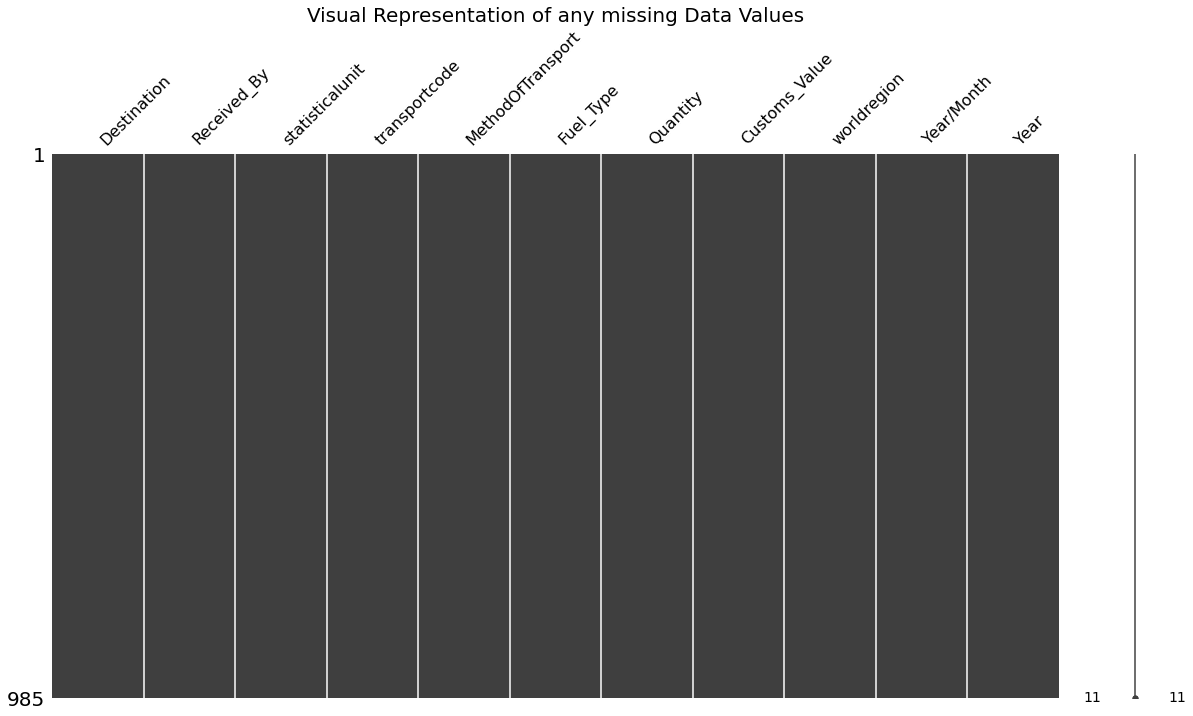

In [189]:
missingno.matrix(new_data, figsize = (20,10))
plt.title('Visual Representation of any missing Data Values', fontsize=20)
plt.show()

## Data Visualizations

### Graphs Displaying Volume and Quantity of Imports to South Africa

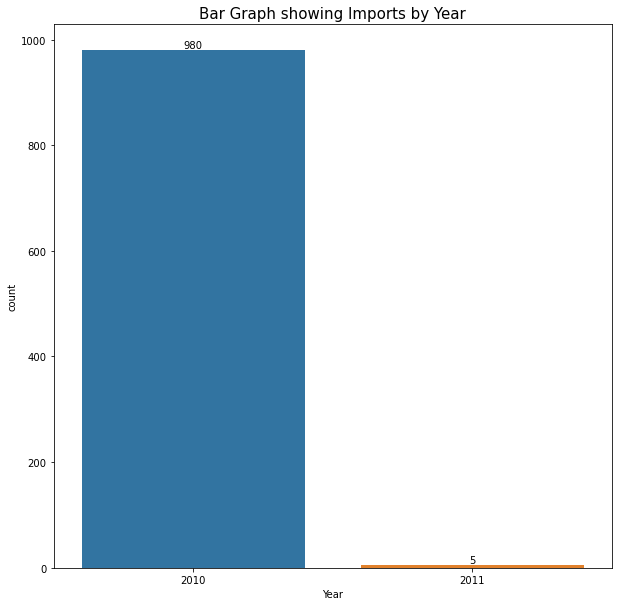

In [190]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x='Year', data=new_data)
ax.bar_label(ax.containers[0])
plt.title('Bar Graph showing Imports by Year', fontsize=15)
plt.show()

Based on the Graph as shown above; Majority of Imports that we have available to us in the current Dataset, occcur in the year 2010. What this means, is that, we can not do a comparison of imports by year in terms of quantity or region procurred. The graph also indicates to us that we may not pay heed to the year 2011, as we have only 5 values to account for in that period.

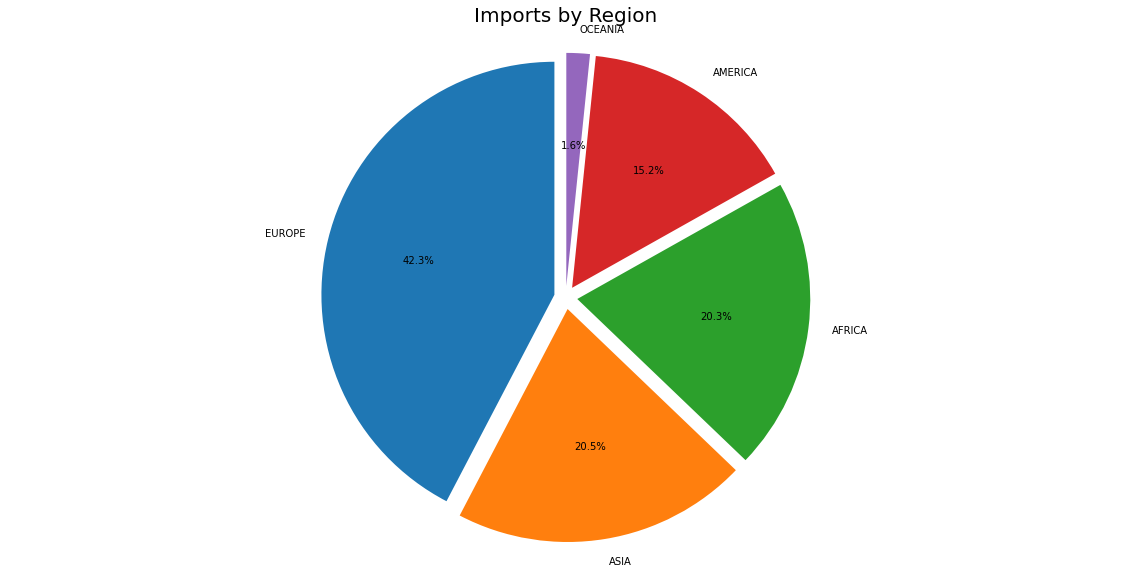

In [191]:
new_data.worldregion.value_counts()

classes = list(new_data.worldregion.value_counts().index)
fig1, ax = plt.subplots()
ax.pie(new_data['worldregion'].value_counts(), explode=[0.05, 0.05, 0.05, 0.05, 0.05],  labels=(classes[0], classes[1], classes[2], classes[3], classes[4]), autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title("Imports by Region", fontsize=20)
plt.show()

Here we can show the number of Imports made to South Africa by continent. This gives us an indication by means of who South Africa is most reliant on for their Imports.

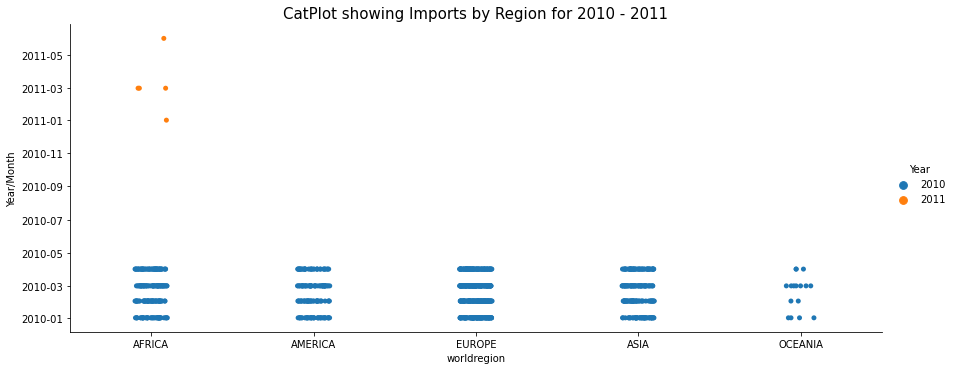

In [197]:
sns.catplot(x='worldregion', y='Year/Month', hue='Year', data=new_data, aspect=2.5)
plt.title('CatPlot showing Imports by Region for 2010 - 2011', fontsize=15)
plt.show()

The CatPlot tells us from which region we have attained imports from and during which month of the year. Majority of our imports of fuel have been recorded in the period 1/January - 1/April; occuring each month. What is interesting; although we only have 5 values for the year 2011; we can see that those imports only occured from African countries and they do not match the trend found in the year 2010. Instead of following the Imports at the start of each month for the first 4 months, we see we have imports on the 1st month, the 3rd month and then on the 6th month. Now we do not have sufficient data to produce a trend, but it is something interesting to look at.

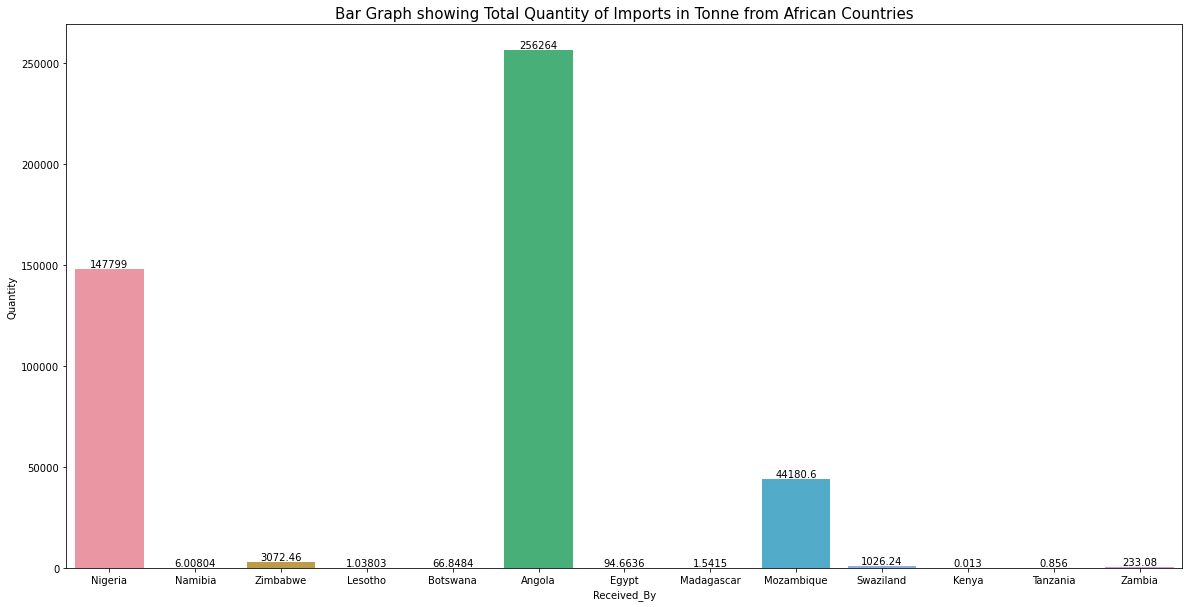

In [198]:
region = new_data.groupby('worldregion')
country = region.get_group('AFRICA')

plt.figure(figsize=(20,10))
ax = sns.barplot(x='Received_By', y='Quantity', data=country, ci=0)
ax.bar_label(ax.containers[0])
plt.title('Bar Graph showing Total Quantity of Imports in Tonne from African Countries', fontsize=15)
plt.show()

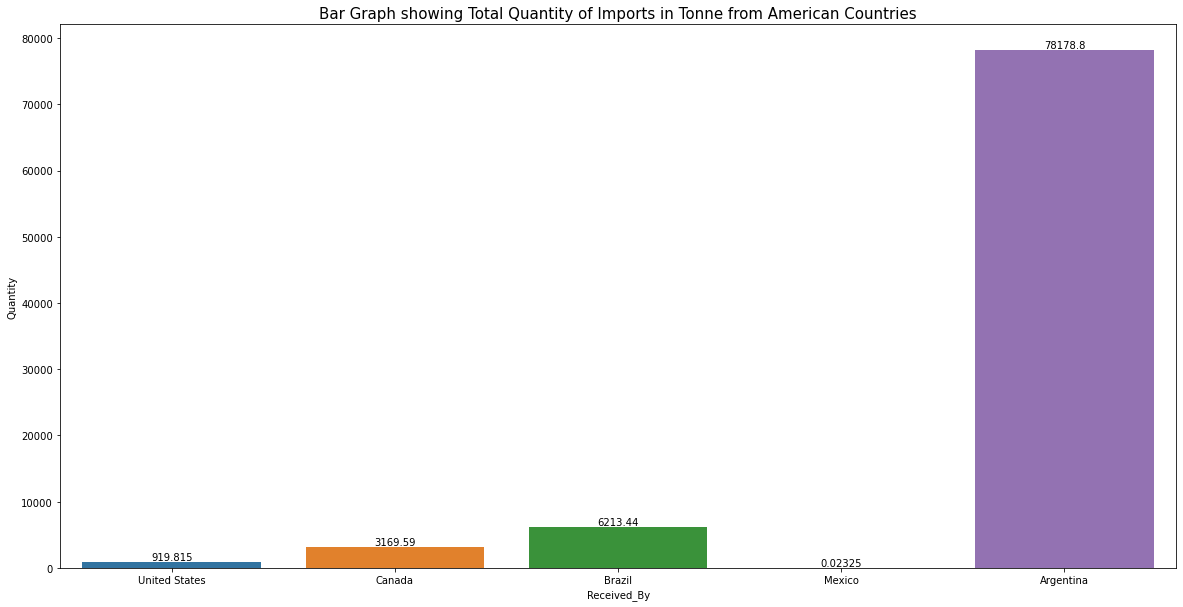

In [199]:
region = new_data.groupby('worldregion')
country = region.get_group('AMERICA')

plt.figure(figsize=(20,10))
ax = sns.barplot(x='Received_By', y='Quantity', data=country, ci=0)
ax.bar_label(ax.containers[0])
plt.title('Bar Graph showing Total Quantity of Imports in Tonne from American Countries', fontsize=15)
plt.show()

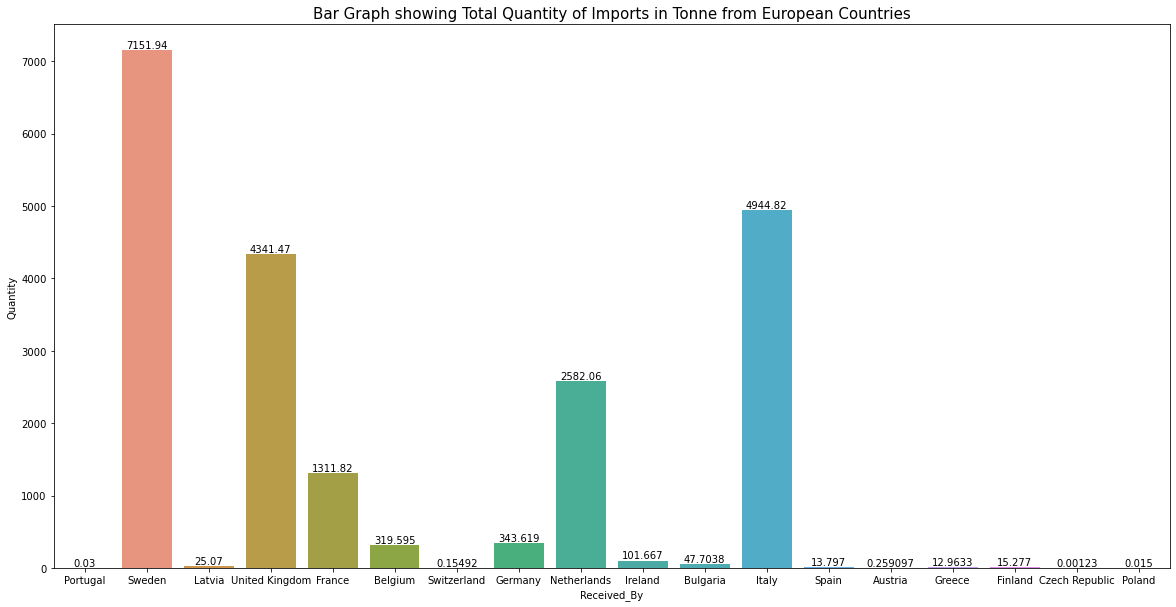

In [200]:
region = new_data.groupby('worldregion')
country = region.get_group('EUROPE')

plt.figure(figsize=(20,10))
ax = sns.barplot(x='Received_By', y='Quantity', data=country, ci=0)
ax.bar_label(ax.containers[0])
plt.title('Bar Graph showing Total Quantity of Imports in Tonne from European Countries', fontsize=15)
plt.show()

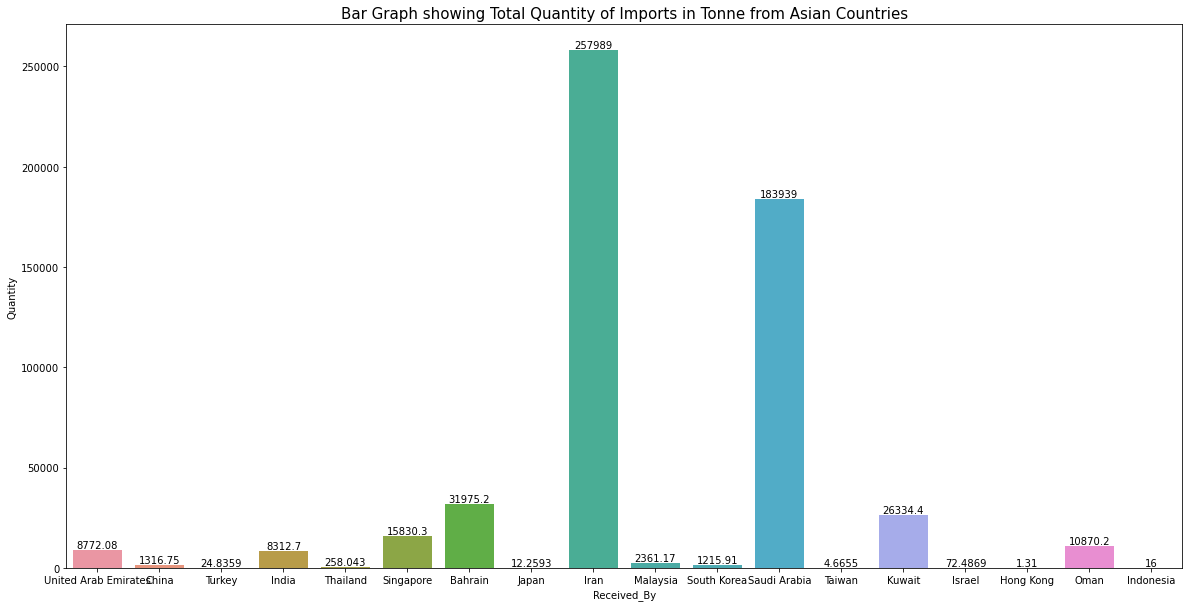

In [201]:
region = new_data.groupby('worldregion')
country = region.get_group('ASIA')

plt.figure(figsize=(20,10))
ax = sns.barplot(x='Received_By', y='Quantity', data=country, ci=0)
ax.bar_label(ax.containers[0])
plt.title('Bar Graph showing Total Quantity of Imports in Tonne from Asian Countries', fontsize=15)
plt.show()

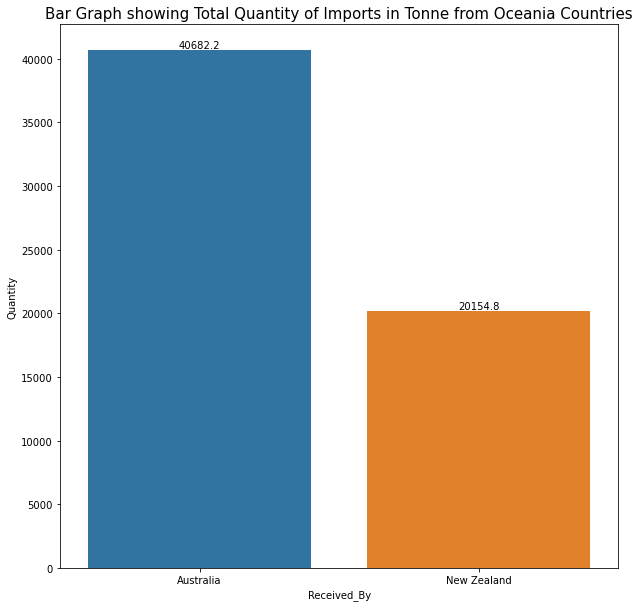

In [202]:
region = new_data.groupby('worldregion')
country = region.get_group('OCEANIA')

plt.figure(figsize=(10,10))
ax = sns.barplot(x='Received_By', y='Quantity', data=country, ci=0)
ax.bar_label(ax.containers[0])
plt.title('Bar Graph showing Total Quantity of Imports in Tonne from Oceania Countries', fontsize=15)
plt.show()

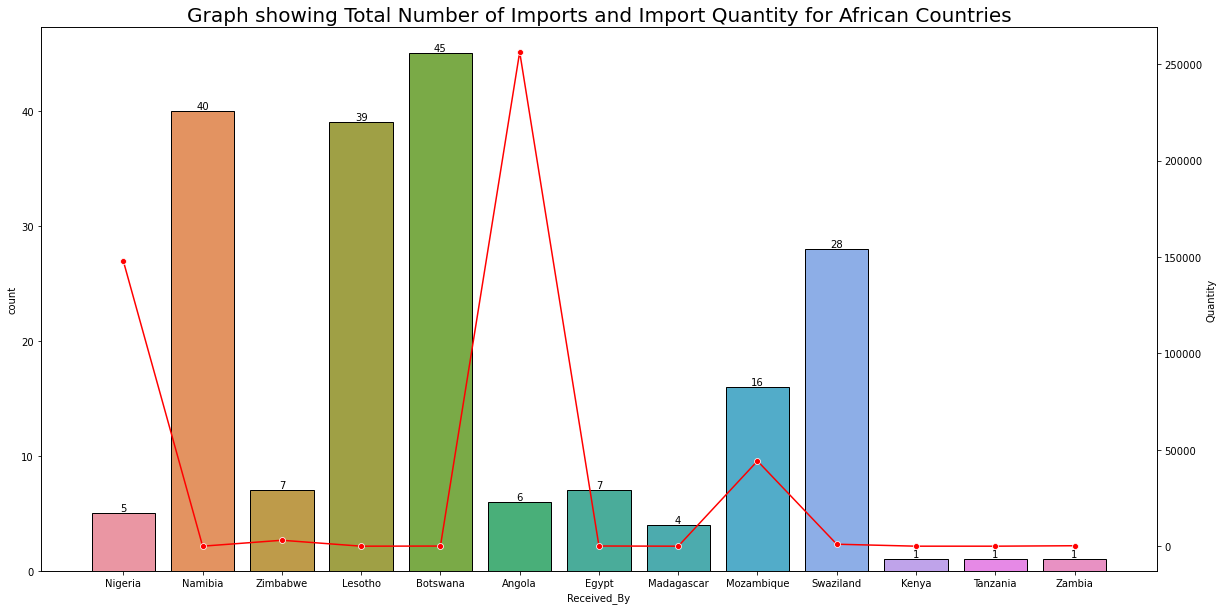

In [203]:
region = new_data.groupby('worldregion')
country = region.get_group('AFRICA')


ax1 = sns.countplot(data=country, x="Received_By", edgecolor="black")
ax1.bar_label(ax1.containers[0])

ax2 = ax1.twinx()
sns.lineplot(data=country, x="Received_By", y="Quantity", color='r', ci=None, marker='o', ax=ax2)

plt.title('Graph showing Total Number of Imports and Import Quantity for African Countries', fontsize=20)
plt.show()

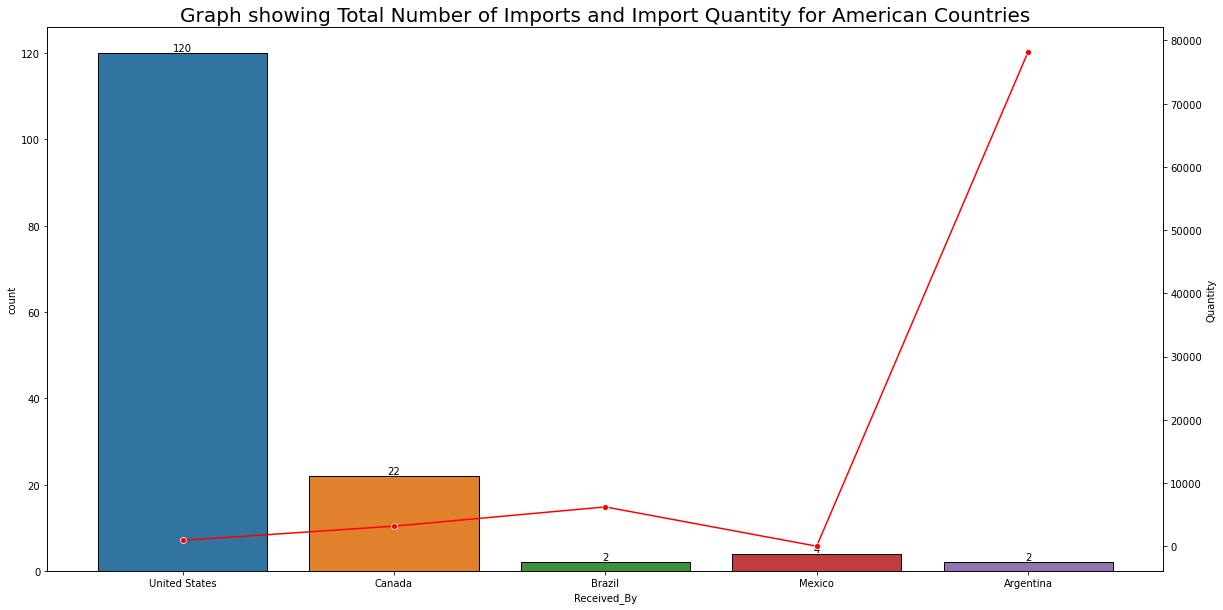

In [204]:
region = new_data.groupby('worldregion')
country = region.get_group('AMERICA')


ax1 = sns.countplot(data=country, x="Received_By", edgecolor="black")
ax1.bar_label(ax1.containers[0])

ax2 = ax1.twinx()
sns.lineplot(data=country, x="Received_By", y="Quantity", color='r', ci=None, marker='o', ax=ax2)

plt.title('Graph showing Total Number of Imports and Import Quantity for American Countries', fontsize=20)
plt.show()

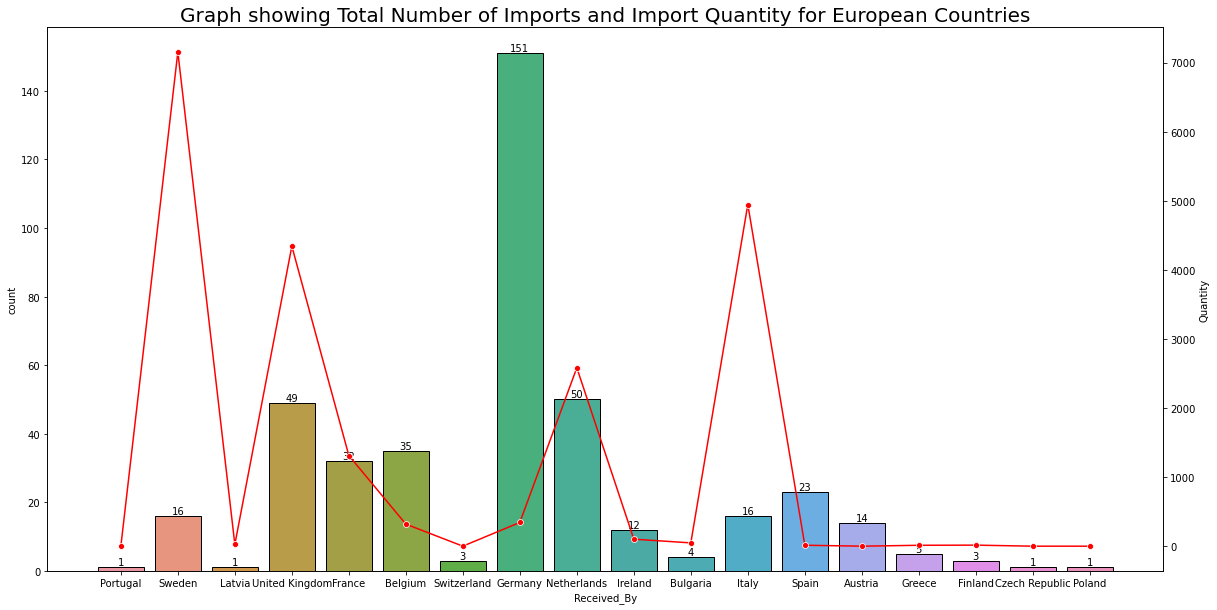

In [205]:
region = new_data.groupby('worldregion')
country = region.get_group('EUROPE')


ax1 = sns.countplot(data=country, x="Received_By", edgecolor="black")
ax1.bar_label(ax1.containers[0])

ax2 = ax1.twinx()
sns.lineplot(data=country, x="Received_By", y="Quantity", color='r', ci=None, marker='o', ax=ax2)

plt.title('Graph showing Total Number of Imports and Import Quantity for European Countries', fontsize=20)
plt.show()

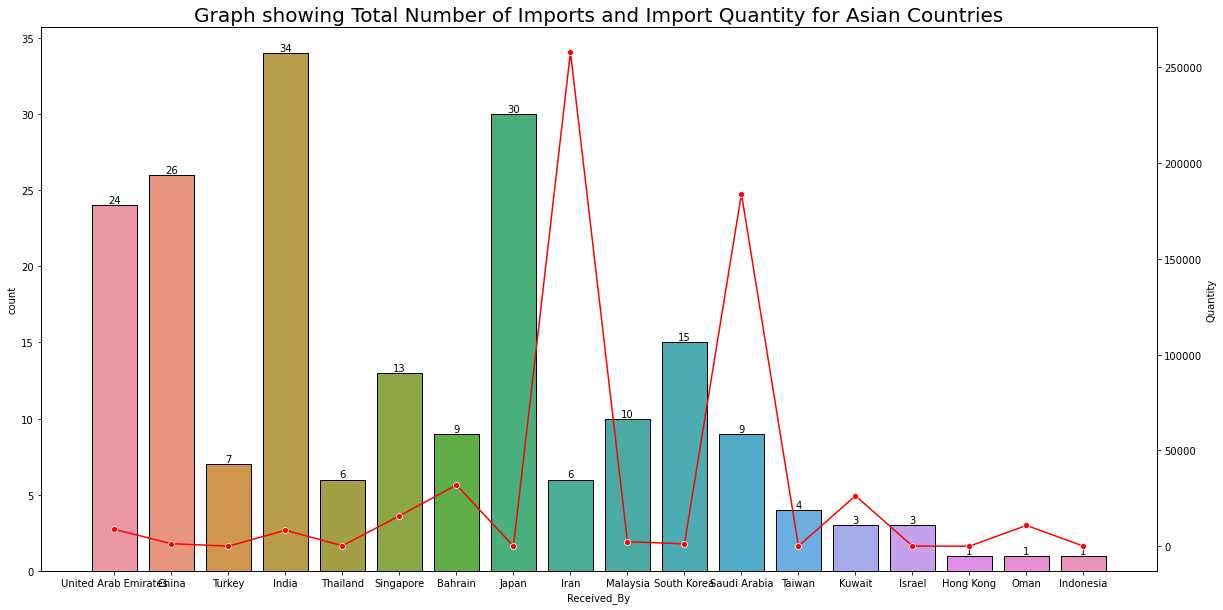

In [206]:
region = new_data.groupby('worldregion')
country = region.get_group('ASIA')


ax1 = sns.countplot(data=country, x="Received_By", edgecolor="black")
ax1.bar_label(ax1.containers[0])

ax2 = ax1.twinx()
sns.lineplot(data=country, x="Received_By", y="Quantity", color='r', ci=None, marker='o', ax=ax2)

plt.title('Graph showing Total Number of Imports and Import Quantity for Asian Countries', fontsize=20)
plt.show()

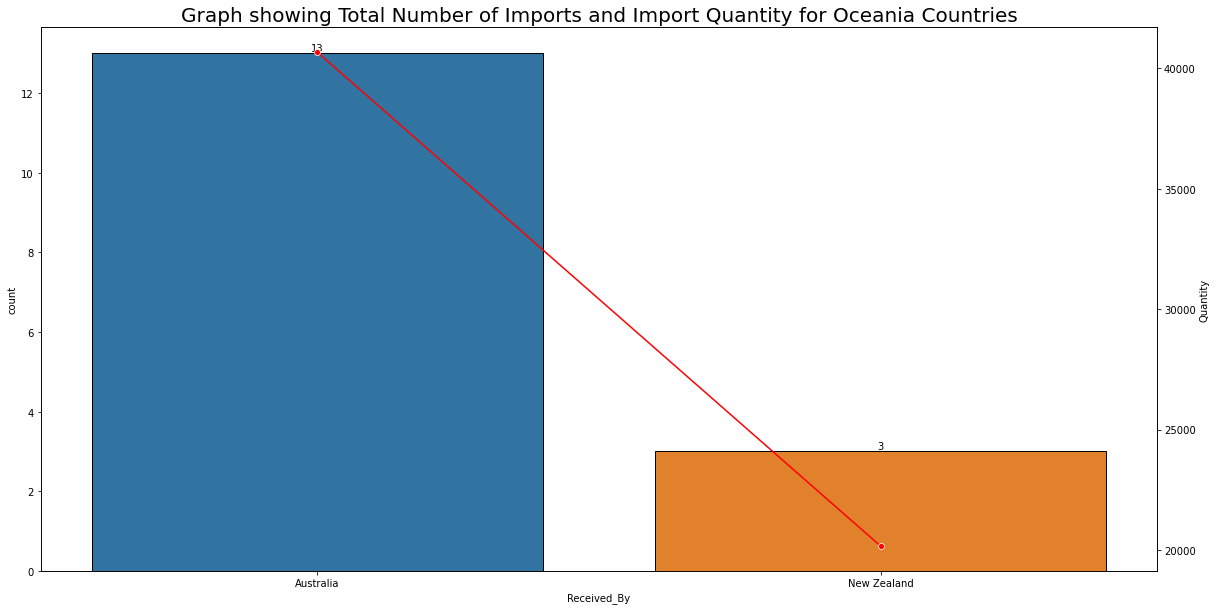

In [207]:
region = new_data.groupby('worldregion')
country = region.get_group('OCEANIA')


ax1 = sns.countplot(data=country, x="Received_By", edgecolor="black")
ax1.bar_label(ax1.containers[0])

ax2 = ax1.twinx()
sns.lineplot(data=country, x="Received_By", y="Quantity", color='r', ci=None, marker='o', ax=ax2)

plt.title('Graph showing Total Number of Imports and Import Quantity for Oceania Countries', fontsize=20)
plt.show()

### Graphs Displaying Information Regarding South Africa

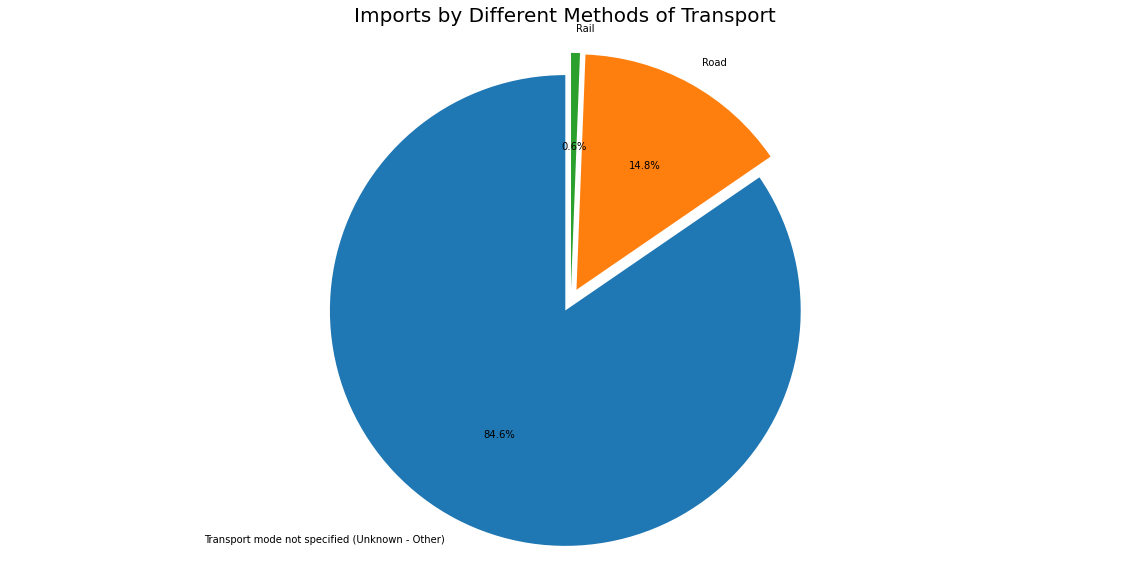

In [208]:
new_data.MethodOfTransport.value_counts()

classes = list(new_data.MethodOfTransport.value_counts().index)
fig1, ax = plt.subplots()
ax.pie(new_data['MethodOfTransport'].value_counts(), explode=[0.05, 0.05, 0.05],  labels=(classes[0], classes[1], classes[2]), autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title("Imports by Different Methods of Transport", fontsize=20)
plt.show()

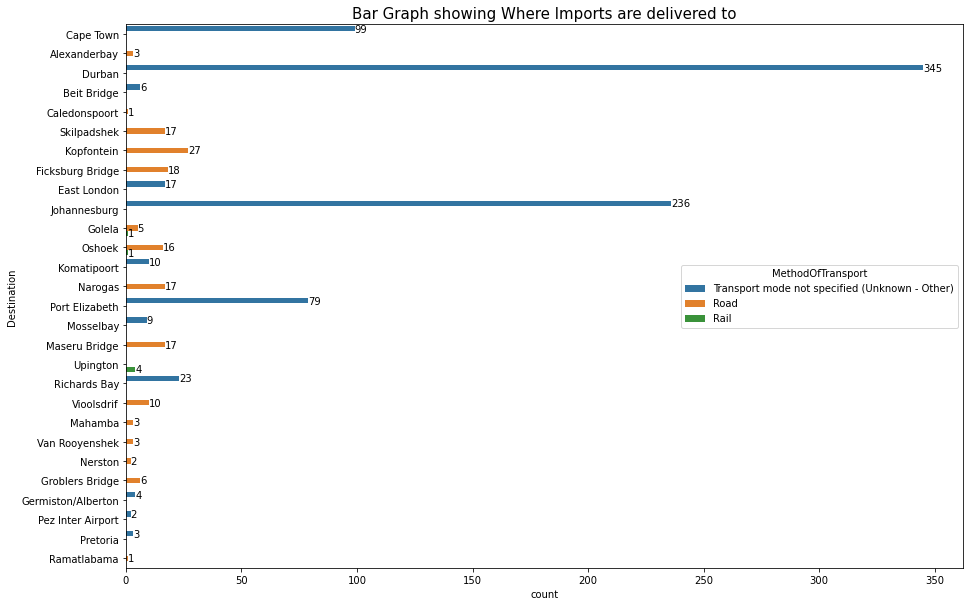

In [209]:
plt.figure(figsize=(15,10))
ax = sns.countplot(y='Destination', data=new_data, hue='MethodOfTransport')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Bar Graph showing Where Imports are delivered to', fontsize=15)
plt.show()

### Graphs Displaying Fuel Type

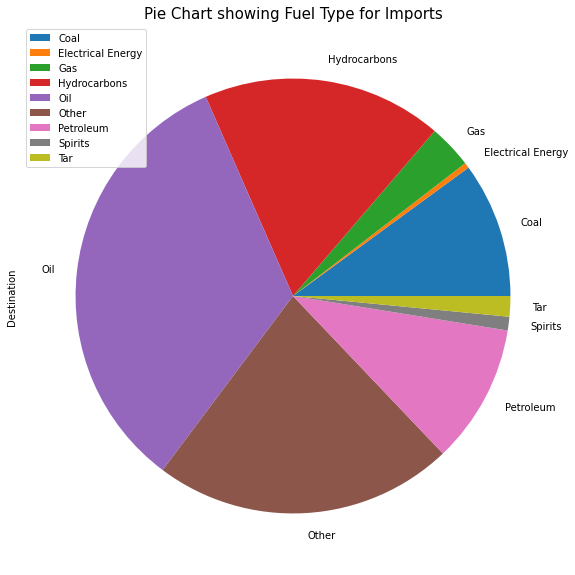

In [210]:
group_by_fuel = new_data.groupby(by=['Fuel_Type'])

fuelcount = group_by_fuel.count()

fuelcount = pd.DataFrame(fuelcount.iloc[:,0])

ax = fuelcount.plot.pie(subplots=True,figsize=(10, 10))
plt.title('Pie Chart showing Fuel Type for Imports', fontsize=15)
plt.legend(loc='upper left')
plt.show()

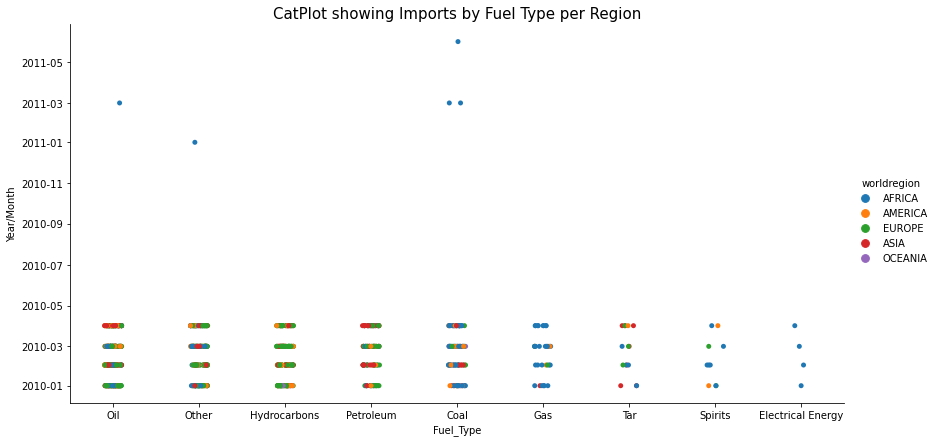

In [211]:
sns.catplot(x='Fuel_Type', y='Year/Month', hue='worldregion', data=new_data, height=6, aspect=2)
plt.title('CatPlot showing Imports by Fuel Type per Region', fontsize=15)
plt.show()

From the graph above; we can get a representation of the period when South Africa imported certain Fuel Types and from which region those imports occured

### Analysis of Price

In [212]:
# Finding all unique price values
new_data['Customs_Value'].unique()

array([ 546876249,       3469,      69173,      39823,        703,
         83587123,      34129,       1000,  273357973,     273266,
            14159,     204507,      40212,   17439211,    1231515,
          6006447,       5963,      21238,     162077,     196635,
           124809,      27033,       9295,     214668,    5092605,
              760,    1019460,      29088,    7552065,    2942146,
         23838558,      72582,      14315,      80277,        197,
              630,      63548,    1267536,  410483523,       1635,
           310591,     374229,   66468978,    4864239,    3633184,
          1731735,     259515,      39706,       5967,  207408828,
           375153,     301607,  885105138,      29978,      11472,
            84003,     102948,    2832492,        456,      37516,
           690077, 1091538778,    3871446,     226257,     179116,
            69559,      53220,     359673,     540904,     488011,
            15480,     732324,    5841080,     233794,      26

In [213]:
# Perfoming a descriptive stat on the Customs column
new_data['Customs_Value'].describe()

count    9.850000e+02
mean     3.629704e+07
std      1.876770e+08
min      8.000000e+00
25%      9.038000e+03
50%      8.442400e+04
75%      6.625340e+05
max      2.245123e+09
Name: Customs_Value, dtype: float64

In [214]:
new_data.Customs_Value.value_counts()

300       4
200       3
50        3
177       3
10        3
         ..
17539     1
1336      1
52575     1
67092     1
285415    1
Name: Customs_Value, Length: 963, dtype: int64

Here we can see that our Price range is quite large. We may want to use binning to categorise our prices into low, mediium and high. Even though the data may include a value that attributes a low cost to a Fuel Type in one entry and a high cost to the same fuel type in another entry; this just makes it ensure a greater accuracy for our predictive model

In [215]:
# Create the bin
binwidth = int((max(new_data['Customs_Value'])-min(new_data['Customs_Value']))/5)

# Setting the range for our bins
bins = range(int(min(new_data['Customs_Value'])), int(max(new_data['Customs_Value'])), binwidth)


new_data['Customs_Bins'] = pd.cut(new_data['Customs_Value'], bins, labels=['Low', 'Low-Medium', 'Medium-High','High'])

new_data.loc[:5, ['Customs_Value', 'Customs_Bins']]

,Customs_Value,Customs_Bins
0,546876249,Low-Medium
1,3469,Low
2,69173,Low
3,39823,Low
4,703,Low
5,83587123,Low


In [216]:
new_data['Customs_Bins'].unique()

['Low-Medium', 'Low', 'Medium-High', 'High', NaN]
Categories (4, object): ['Low' < 'Low-Medium' < 'Medium-High' < 'High']

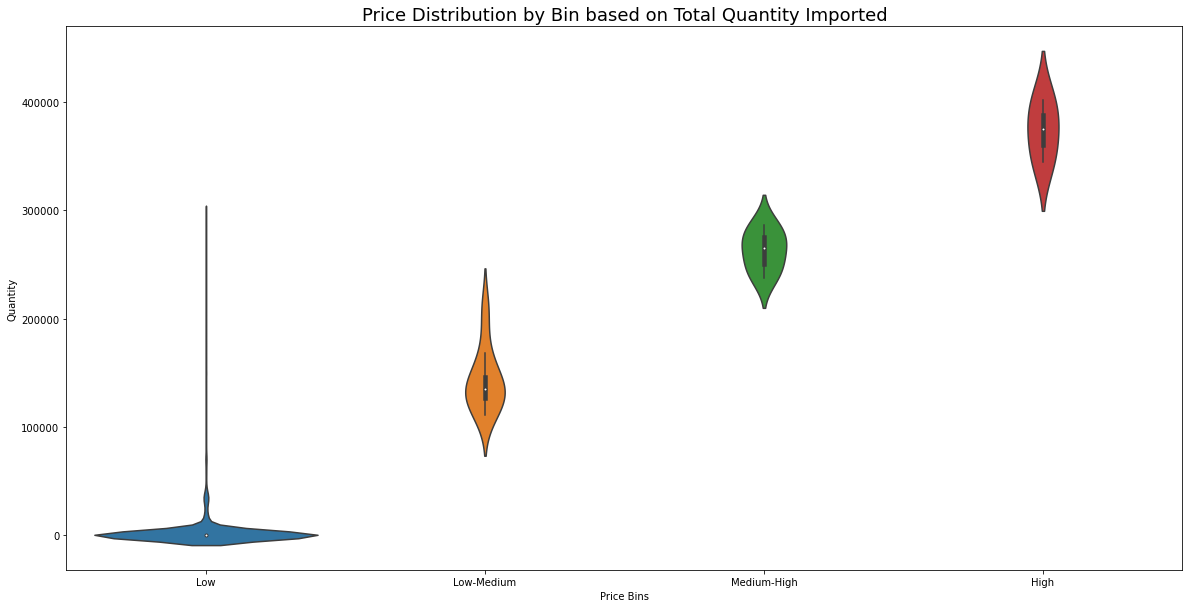

In [217]:
p = sns.violinplot(data = new_data, x = 'Customs_Bins', y = 'Quantity')
p.set(xlabel='Price Bins', ylabel='Quantity')
plt.title('Price Distribution by Bin based on Total Quantity Imported', fontsize=18)
plt.show()

Thius is a Violin Plot graph to represent the distribution of Price per quantity bought in the respective price bins. What is interesting from this observation, is that we have many overlapping quantitiess bought in different price ranges. However, one thing that is clear from this graph, is that there is a trend that correlates total quantity purchased to its relative price bins.

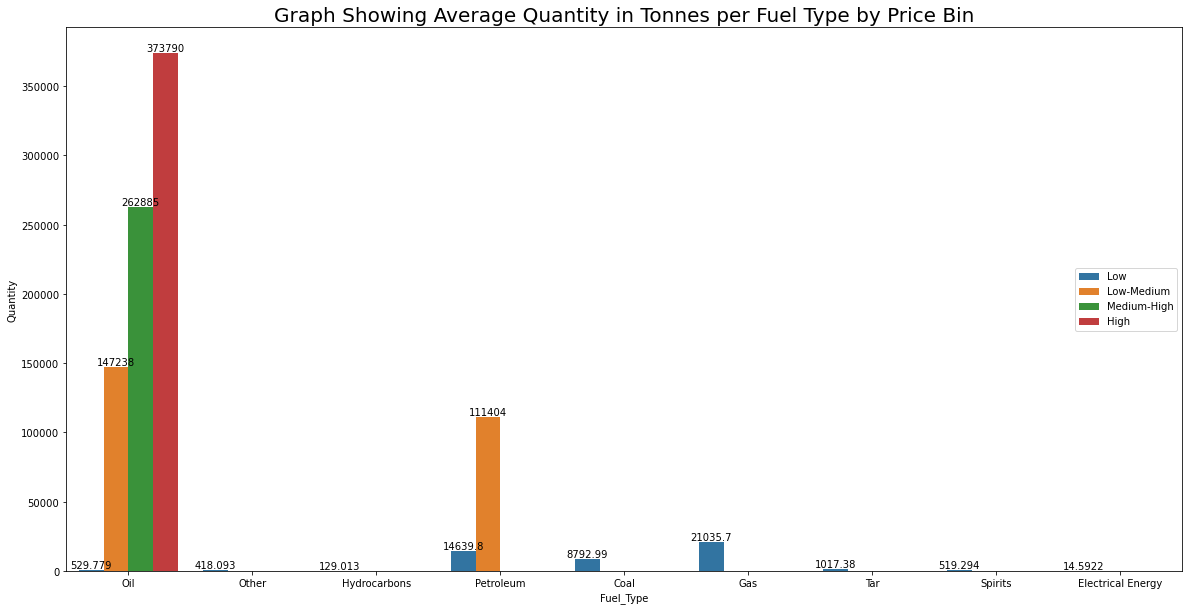

In [234]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.barplot(x="Fuel_Type", y="Quantity", hue='Customs_Bins', data=new_data, ci=0)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.title('Graph Showing Average Quantity in Tonnes per Fuel Type by Price Bin', fontsize=20)
plt.legend(loc='center right')
plt.show()

What this graph tells us, is that South Africa is paying a large amount for its Oil Imports as compared to its other Fuel Types. 

## Summary of Analysis
The dataset that I performed my analysis on, comprised of all the different fuel types South Africa Imported during the period 2010 - 2011. It was clear that the Year 2011 was insignificant for our analysis as it only contained 5 unique values out of the 1000 entries we started with. I dropped all unnecessary columns that added no meaningful data to our analysis. I converted numerical units for better handling. I renamed descriptive values of the fuel Type and tried to categorise them accordingly. My reason for doing so was to better portray these values through visualizations that would be easy to follow from a user perspective. 

I performed analysis on Total Imports by Quantity. Total Imports by Region. Where Imports end up in South Africa. By which mode of transport do imports mainly occur. The price we pay for Imports. The price in relation to quantity for Imports.

What the data ended up telling us, is that, although South Africa imports a great amount from certain countries, they do not correlate to the quantity imported. We see we imported 120 units From United States and only 2 units from Argentina; however, Argentina produced a higher quantity of Exports than United States

In terms of the Prce analysis; it is clear that oil is the contributing factor to our Importation expenses, filling the upper binsof our price range, with Petroleum being 2nd only filling the lower 2 bins of our price range.

### This Review was done by:

#### Christopher Myburgh